In [4]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [37]:
school_districts = gpd.read_file('../data/school_districts.geojson')
print(school_districts.crs)


EPSG:4326


In [12]:
bikeracks = gpd.read_file('../data/bikeracks.geojson')
print(bikeracks.crs)
bikeracks.head( )

EPSG:4326


,detail_loc,quantity,location,domain,idnumber,objectid,status,lon,type,data_colle,lat,capacity,geometry
0,Hickory Hollow Mall,1,Mall,Public,113,1,Existing,-86.6554527779,Rack,Health Dept,36.0499277778,12,POINT (-86.65545 36.04993)
1,Stones River Greenway - Donelson/Hermitage Area,2,Greenway,Public,114,2,Existing,-86.6340625226,Rack,Health Dept,36.1852800378,4,POINT (-86.63406 36.18528)
2,"Percy Priest Reservoir, Stones River Greenway",0,Park/Greenway,Public,256,3,Proposed,-86.6206705697,Rack,Health Dept,36.1584215986,0,POINT (-86.62067 36.15842)
3,"Two Rivers Golf Course, Stones River Greenway ...",1,Park/Greenway,Public,115,4,Existing,-86.6865259267,Rack,Health Dept,36.1875466948,5,POINT (-86.68653 36.18755)
4,East Park & Community Center,3,Park/Community Center,Public,103,5,Existing,-86.7621800831,Rack,Health Dept,36.1724554062,15,POINT (-86.76218 36.17246)


In [13]:
type(school_districts)

geopandas.geodataframe.GeoDataFrame

In [14]:
type(bikeracks)

geopandas.geodataframe.GeoDataFrame

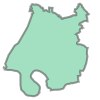

In [15]:
school_districts.loc[0, 'geometry']

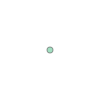

In [16]:
bikeracks.loc[0, 'geometry']

<Axes: >

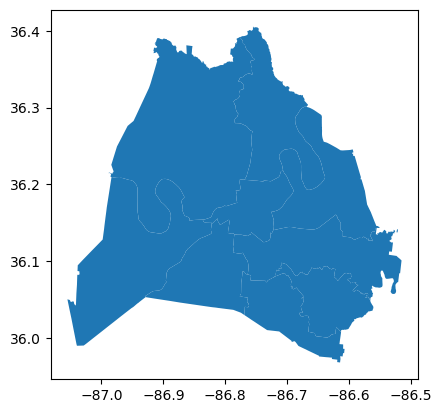

In [18]:
school_districts.plot()

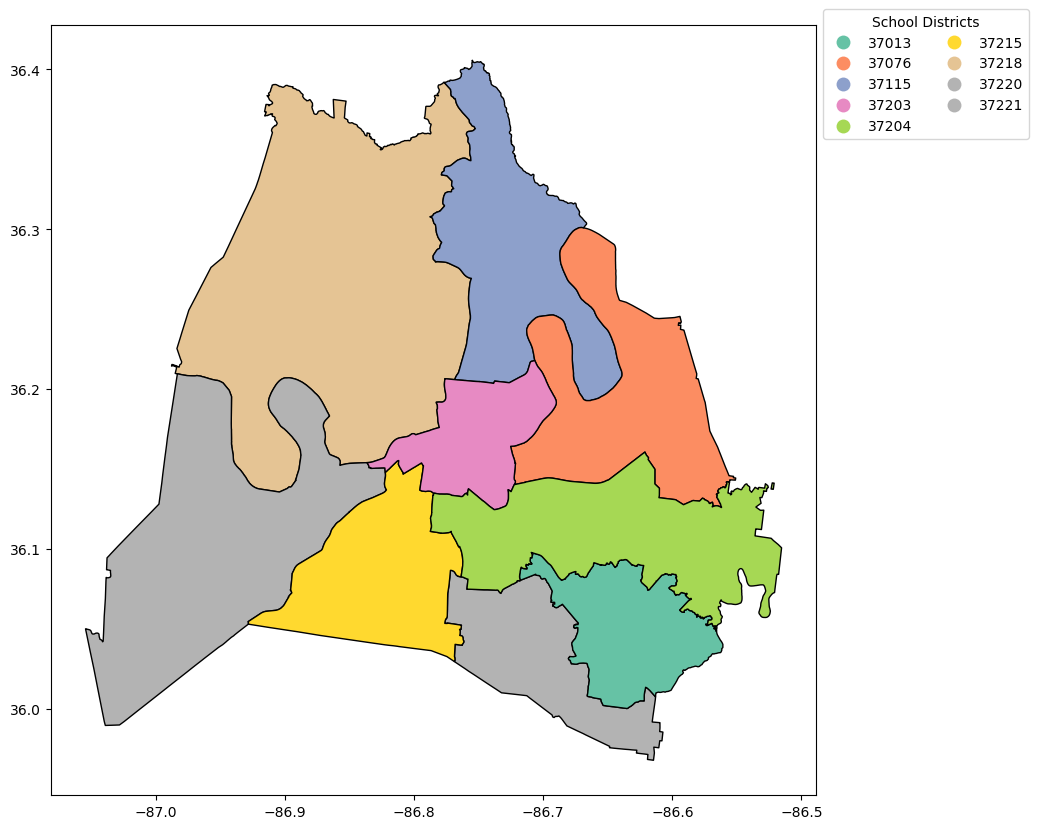

In [21]:
leg_kwds = {'title': 'School Districts', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

school_districts.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [39]:
bike_geo = gpd.GeoDataFrame(bikeracks, 
                           crs = school_districts.crs, 
                           geometry = bikeracks['geometry'])
bike_geo.head()

,detail_loc,quantity,location,domain,idnumber,objectid,status,lon,type,data_colle,lat,capacity,geometry
0,Hickory Hollow Mall,1,Mall,Public,113,1,Existing,-86.6554527779,Rack,Health Dept,36.0499277778,12,POINT (-86.65545 36.04993)
1,Stones River Greenway - Donelson/Hermitage Area,2,Greenway,Public,114,2,Existing,-86.6340625226,Rack,Health Dept,36.1852800378,4,POINT (-86.63406 36.18528)
2,"Percy Priest Reservoir, Stones River Greenway",0,Park/Greenway,Public,256,3,Proposed,-86.6206705697,Rack,Health Dept,36.1584215986,0,POINT (-86.62067 36.15842)
3,"Two Rivers Golf Course, Stones River Greenway ...",1,Park/Greenway,Public,115,4,Existing,-86.6865259267,Rack,Health Dept,36.1875466948,5,POINT (-86.68653 36.18755)
4,East Park & Community Center,3,Park/Community Center,Public,103,5,Existing,-86.7621800831,Rack,Health Dept,36.1724554062,15,POINT (-86.76218 36.17246)


In [31]:
type(bike_geo)

geopandas.geodataframe.GeoDataFrame

In [32]:
#  = zipcodes[['zip', 'po_name', 'geometry']]
rack_in_schoolzone = gpd.sjoin(bike_geo, school_districts, op = 'within')

C:\Users\jojns\anaconda3\envs\geospatial\lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [33]:
rack_in_schoolzone.head()

,detail_loc,quantity,location,domain,idnumber,objectid,status,lon,type,data_colle,...,city,zip,email,state,last_name,address,position,term_expir,district,phone
0,Hickory Hollow Mall,1,Mall,Public,113,1,Existing,-86.6554527779,Rack,Health Dept,...,Antioch,37013,tyese.hunter@mnps.org,TN,Hunter,2433 Evanfield Court,Member,2018,6,615-739-8068
141,Antioch Middle School,0,Middle School,Public,331,142,Proposed,-86.6721262461,Rack,Health Dept,...,Antioch,37013,tyese.hunter@mnps.org,TN,Hunter,2433 Evanfield Court,Member,2018,6,615-739-8068
142,J E Moss Elementary School,2,Elementary School,Public,175,143,Existing,-86.6693833338,Rack,Health Dept,...,Antioch,37013,tyese.hunter@mnps.org,TN,Hunter,2433 Evanfield Court,Member,2018,6,615-739-8068
143,Apollo Middle School,2,Middle School,Public,176,144,Existing,-86.6642388884,Rack,Health Dept,...,Antioch,37013,tyese.hunter@mnps.org,TN,Hunter,2433 Evanfield Court,Member,2018,6,615-739-8068
144,Lakeview Design Center School,0,School,Public,332,145,Proposed,-86.6303500004,Rack,Health Dept,...,Antioch,37013,tyese.hunter@mnps.org,TN,Hunter,2433 Evanfield Court,Member,2018,6,615-739-8068


In [36]:
rack_in_schoolzone['zip'].value_counts()

zip
37203    199
37218     61
37115     37
37076     31
37215     26
37204     24
37221     24
37013     16
37220      8
Name: count, dtype: int64

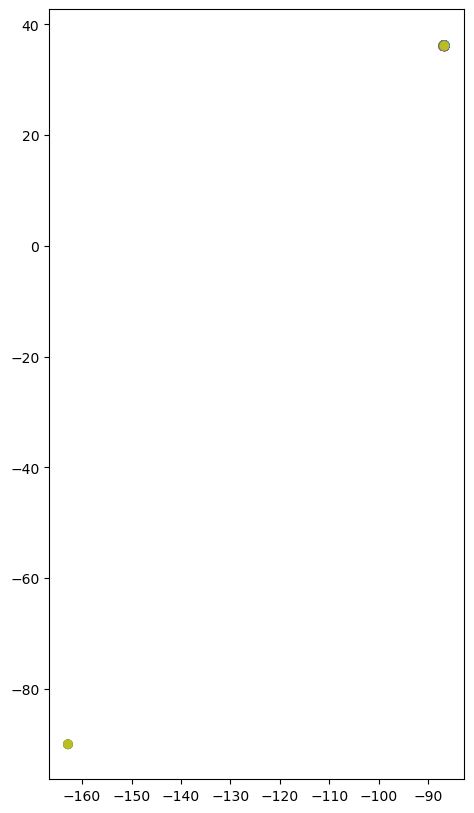

In [42]:
ax = school_districts.plot(figsize = (8, 10), color = 'lightgreen')
bike_geo.plot( ax = ax, column = 'location');
plt.show();